In [23]:
from sklearn.svm import SVC
import sklearn.tree as tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import GridSearchCV

In [24]:
dataset = pd.read_csv('C:\\Users\\25044\\Desktop\\CW_Data.csv',index_col='ID')# read data and make name as index
dataset.dropna(inplace=True)#delete lost or incomplete data

In [25]:
dataset.head()#观察一下数据状况

,Q1,Q2,Q3,Q4,Q5,Programme
ID,,,,,,
1.0,32.0,7.0,3.0,12.0,4.0,1.0
2.0,32.0,7.0,10.0,12.0,12.0,2.0
3.0,12.0,0.0,0.0,0.0,0.0,1.0
4.0,16.0,0.0,2.0,0.0,1.0,3.0
5.0,28.0,0.0,0.0,0.0,0.0,2.0


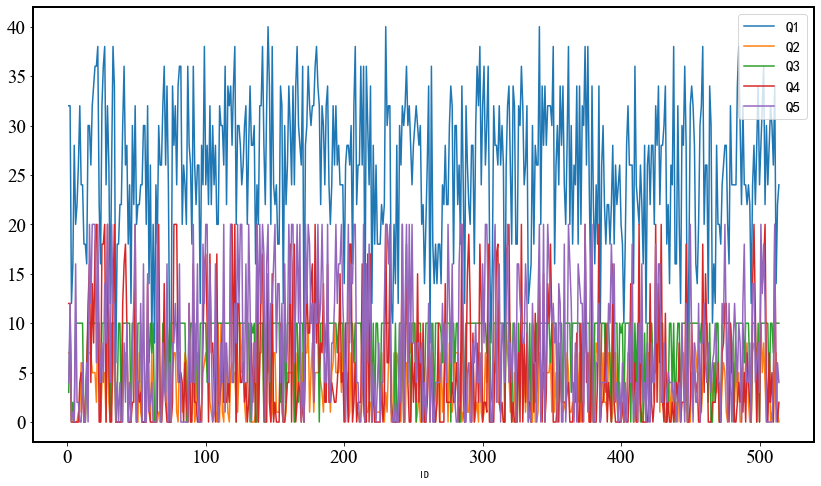

In [26]:
#对数据进行可视化
import datetime
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 
data_plot = dataset.drop(columns=['Programme'])
data_plot.plot(figsize = (14,8))
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2);
ax.spines['left'].set_linewidth(2);
ax.spines['right'].set_linewidth(2);
ax.spines['top'].set_linewidth(2);
x1_label = ax.get_xticklabels()
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
plt.tick_params(labelsize=19)
plt.legend(prop={'family':'SimHei','size':15},loc='best')
plt.show()



In [27]:
#数据预处理：将其特征标准化，减小不同特征间量纲和大小带来的影响 to reduce the effect incurred by the size and standardize the characteristic
column = list(dataset.columns)
column.remove('Programme')
for col in column:
    stand=StandardScaler()
    dataset[col] = stand.fit_transform(dataset[col].values.reshape(-1,1))

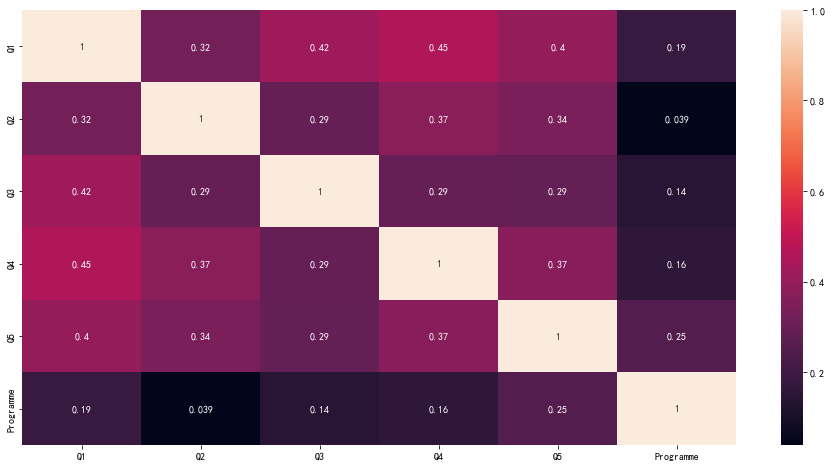

In [28]:
###to see the relationship between parameters
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 
dataset_corr = dataset.corr()#
plt.figure(figsize=(16,8))#f
fig=sns.heatmap(dataset_corr,annot=True,fmt='.2g')


In [29]:
X = dataset.drop(columns=['Programme'])
y = dataset['Programme']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=123,stratify=y) 



In [30]:
clf1 = SVC(C=1,kernel='rbf',gamma=0.01)#define svm model ，make rbf，gammaas 0.01，C=1
clf1.fit(x_train,y_train)#
y_pred = clf1.predict(x_test)#
print("SVM:")
print(classification_report(y_test,y_pred))#
f1_micro = f1_score(y_test,y_pred,average='micro')
p_micro = precision_score(y_test,y_pred,average='micro')
r_micro= recall_score(y_test,y_pred,average='micro')
print("f1_micro:",f1_micro)
print("p_micro:",p_micro)
print("r_micro:",r_micro)

SVM性能指标:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.47      0.21      0.29        33
         2.0       0.52      0.87      0.65        53
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         9

    accuracy                           0.51       103
   macro avg       0.20      0.22      0.19       103
weighted avg       0.42      0.51      0.43       103

f1_micro: 0.5145631067961165
p_micro: 0.5145631067961165
r_micro: 0.5145631067961165


In [31]:
y_test_cart = to_categorical(y_test)#turn the index into one-hot 
y_train_cart = to_categorical(y_train)#

param_grid = {'criterion': ['entropy', 'gini'], 
            'max_depth': [3, 5, 7,12,15,20], # 树的深度
            'min_samples_split': [16, 20, 24, 28,30,34,38]} 

clf2 = tree.DecisionTreeClassifier()  

clfcv = GridSearchCV(estimator=clf2, param_grid=param_grid, scoring='roc_auc',cv=4) 

clfcv.fit(x_train, y_train_cart)

test_result = clfcv.predict(x_test)
#model evaluation
print("decision tree:")
print(classification_report(y_test_cart,test_result))
f1_micro = f1_score(y_test_cart,test_result,average='micro')
p_micro = precision_score(y_test_cart,test_result,average='micro')
r_micro= recall_score(y_test_cart,test_result,average='micro')
print("f1_micro:",f1_micro)
print("p_micro:",p_micro)
print("r_micro:",r_micro)

决策树性能指标:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.56      0.30      0.39        33
           2       0.58      0.53      0.55        53
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         9

   micro avg       0.58      0.37      0.45       103
   macro avg       0.23      0.17      0.19       103
weighted avg       0.48      0.37      0.41       103
 samples avg       0.37      0.37      0.37       103

f1_micro: 0.4497041420118344
p_micro: 0.5757575757575758
r_micro: 0.36893203883495146


In [32]:
from collections import Counter

Counter(dataset['Programme'])#see the sample distriution
#according to itm we know the the number of students who major in 0,3,4 is pretty small, then the model is not very accurate

#该类问题属于样本不平衡情况下的分类问题 because the imbalance distribution of the sample, we can use PCA to adress such a issue

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
X_new = pca.transform(X)

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_new, y, train_size=0.8,random_state=123,stratify=y) 


In [33]:
y_train_pca = to_categorical(y_train_pca)
y_test_pca = to_categorical(y_test_pca)

param_grid = {'criterion': ['entropy', 'gini'], 
            'max_depth': [3, 5, 7,12,15,20],
            'min_samples_split': [16, 20, 24, 28,30,34,38]} 

clf3 = tree.DecisionTreeClassifier() 
clfcv = GridSearchCV(estimator=clf3, param_grid=param_grid, scoring='roc_auc',cv=4) 

clfcv.fit(x_train_pca, y_train_pca)

test_result = clfcv.predict(x_test_pca)

print("the revised decision tree :")
print(classification_report(y_test_pca,test_result))
f1_micro = f1_score(y_test_pca,test_result,average='micro')
p_micro = precision_score(y_test_pca,test_result,average='micro')
r_micro= recall_score(y_test_pca,test_result,average='micro')
print("f1_micro:",f1_micro)
print("p_micro:",p_micro)
print("r_micro:",r_micro)


特征提取后决策树性能指标:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.62      0.30      0.41        33
           2       0.61      0.81      0.69        53
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         9

   micro avg       0.61      0.51      0.56       103
   macro avg       0.25      0.22      0.22       103
weighted avg       0.51      0.51      0.49       103
 samples avg       0.51      0.51      0.51       103

f1_micro: 0.5578947368421053
p_micro: 0.6091954022988506
r_micro: 0.5145631067961165
